# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

Давайте рассмотрим базовые вещи в синтаксисе Tensorflow 2.

Выведем строку Hello world, а также версию tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.12.0
TensorFlow 2.0 Hello World


# Классификация изображений одежды

В данном случае мы будем использовать High API от TensorFlow

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


## Импортируем Fashion MNIST датасет

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета 

Давайте посмотрим структуры полученного массива данных:

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

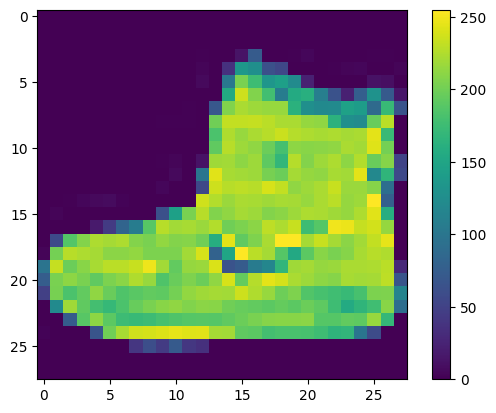

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Посмотрим первые 25 изображений:

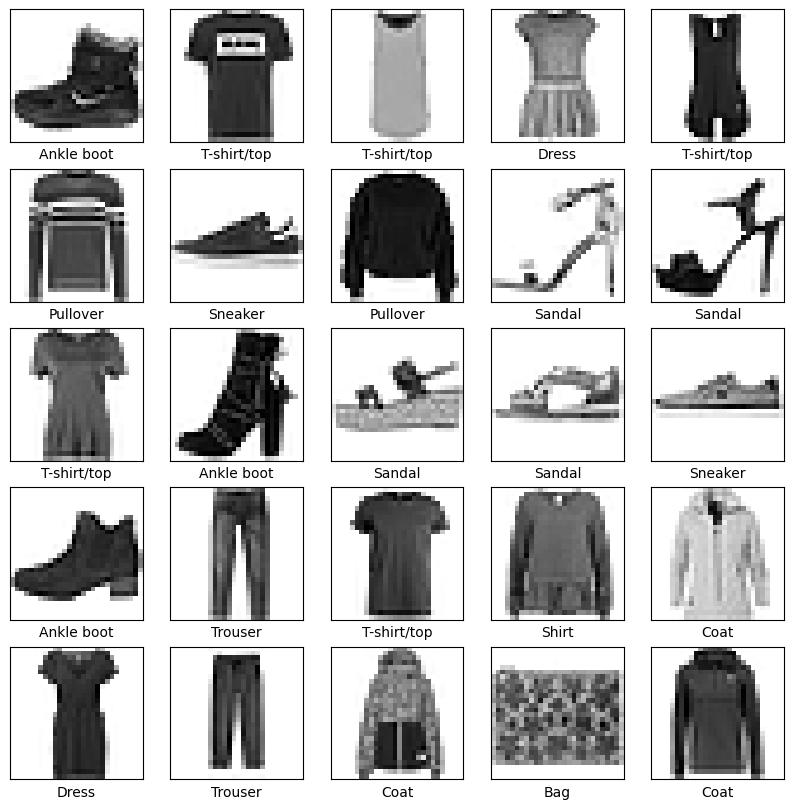

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



```
# Выбран кодовый формат
```

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(10)
])

Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [34]:
# Т.к. задача регрессии, удобнее использовать mean square error(средне-квадратичная ошибка).
# В качестве метрики берем mean absolute error (средний модуль ошибки)
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.



### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [35]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4708 - accuracy: 0.8311
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3582 - accuracy: 0.8681
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3245 - accuracy: 0.8786


In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3642 - accuracy: 0.8675 - 1s/epoch - 3ms/step

Test accuracy: 0.8675000071525574


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых даыннх и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети - 

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [19]:
predictions[0]

array([1.3602756e-04, 2.3078859e-04, 4.6289587e-04, 7.1929586e-05,
       2.6003749e-04, 6.3250974e-02, 2.4075467e-04, 1.5356295e-01,
       1.9693566e-03, 7.7981430e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

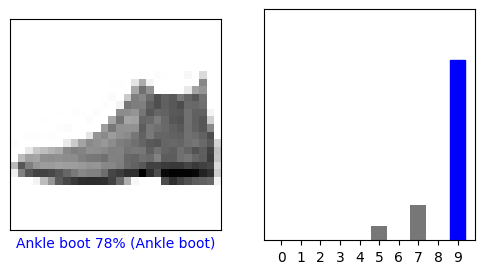

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

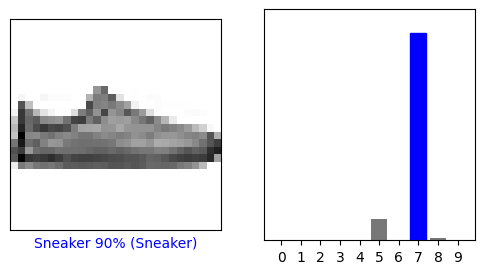

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Давайте сделаем еще несколько предсказаний - 

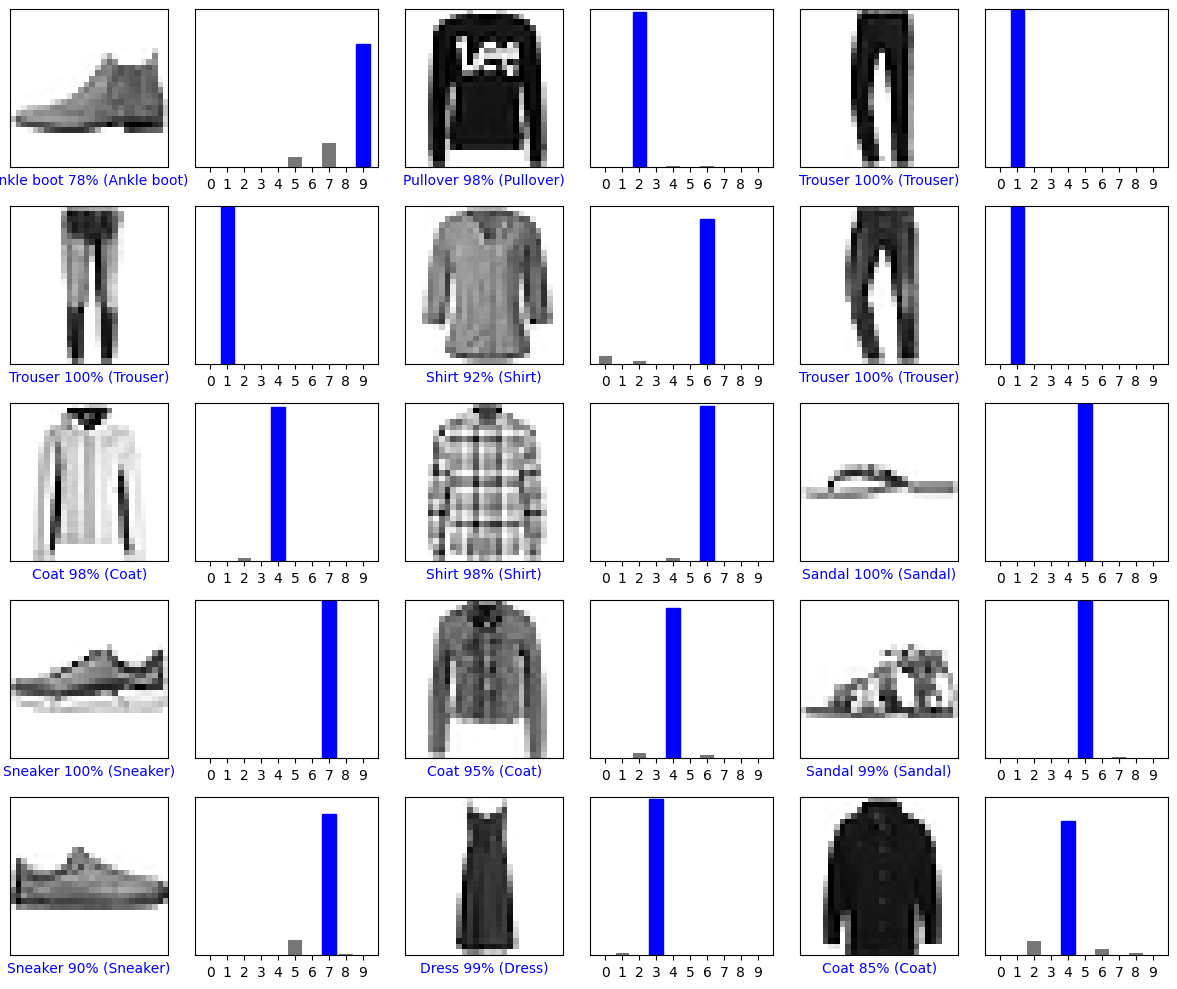

In [25]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборке и посмотрим предсказание нейронной сети - 

In [26]:
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[1.2568572e-03 3.9068869e-05 9.8342770e-01 6.8724665e-05 8.2358317e-03
  3.8289032e-05 6.8807499e-03 6.1976193e-06 4.2185067e-05 4.4426915e-06]]


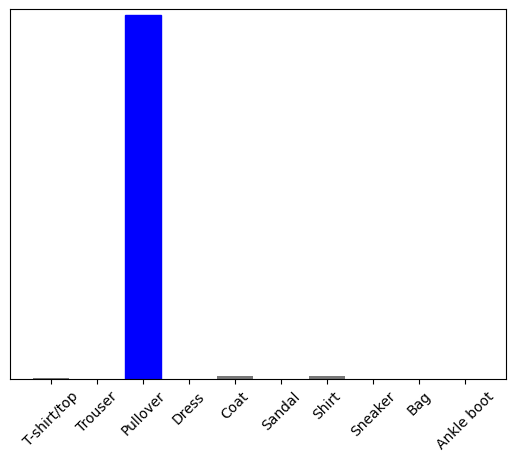

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [30]:
np.argmax(predictions_single[0])

2

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание

## Практическое задание

<ol>
    <li>1. Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. 
       Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?<br><br>
    </li>   
    
</ol>

In [37]:
# baseline
model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.3703 - accuracy: 0.8610 - 880ms/epoch - 3ms/step


[0.3702681064605713, 0.8610000014305115]

In [31]:
# увеличим количество эпох
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.fit(train_images, train_labels, epochs=10)
model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4706 - accuracy: 0.8293
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3554 - accuracy: 0.8693
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3231 - accuracy: 0.8800
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2972 - accuracy: 0.8884
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2841 - accuracy: 0.8937
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2704 - accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2577 - accuracy: 0.9037
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2489 - accuracy: 0.9061
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2390 - accuracy: 0.9102
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.231

[0.3263416886329651, 0.8848000168800354]

In [39]:
# увеличим количество слоев
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3)
model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4748 - accuracy: 0.8272
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3607 - accuracy: 0.8677
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3243 - accuracy: 0.8798
313/313 - 1s - loss: 0.3575 - accuracy: 0.8691 - 712ms/epoch - 2ms/step


[0.3574603199958801, 0.8690999746322632]

In [40]:
# изменим функцию активации
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='selu'),
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3)
model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4840 - accuracy: 0.8237
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3815 - accuracy: 0.8607
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3459 - accuracy: 0.8734
313/313 - 1s - loss: 0.3742 - accuracy: 0.8639 - 681ms/epoch - 2ms/step


[0.37418922781944275, 0.8639000058174133]

In [41]:
# добавим BatchNormalization
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(synchronized=True),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.BatchNormalization(synchronized=True),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3)
model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/3
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4886 - accuracy: 0.8277
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3987 - accuracy: 0.8566
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3586 - accuracy: 0.8691
313/313 - 1s - loss: 0.3771 - accuracy: 0.8652 - 720ms/epoch - 2ms/step


[0.3771262764930725, 0.8651999831199646]

In [43]:
# добавим Dropout
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3)
model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5566 - accuracy: 0.7994
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4150 - accuracy: 0.8480
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3802 - accuracy: 0.8607
313/313 - 1s - loss: 0.3647 - accuracy: 0.8711 - 1s/epoch - 5ms/step


[0.3646673262119293, 0.8711000084877014]

Увеличению точности сетии способствует:
- увеличение количества эпох (но нужно отслеживать переобучение)
- увеличение количетсва слоев (но нужно работать с затуханием градиента)
- изменение функции активации
- добавление BatchNormalization
- добавление Dropout
